# $N^2$-Queens — MCMC



In [1]:
import numpy as np
import matplotlib.pyplot as plt

from plot import plot_energy_curve, plot_energy_curve_average, compare_annealing_effect, min_energy_vs_N, plot_min_energy_vs_N
from utility import random_state, get_positions, queens_attack, compute_energy, compute_delta_energy
from mcmc import MCMC_result, metropolis_step_single, run_mcmc, average_energy_over_runs


plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['axes.grid'] = True


- (i, j, k)

## MCMC without annealing

step 5000: energy=225, beta=1.250, acceptance=16.3%
step 10000: energy=217, beta=1.250, acceptance=13.2%
step 15000: energy=233, beta=1.250, acceptance=12.5%
step 20000: energy=231, beta=1.250, acceptance=12.3%
step 25000: energy=207, beta=1.250, acceptance=12.0%
step 30000: energy=219, beta=1.250, acceptance=11.7%
step 35000: energy=220, beta=1.250, acceptance=11.5%
step 40000: energy=213, beta=1.250, acceptance=11.3%
step 45000: energy=221, beta=1.250, acceptance=11.1%
step 50000: energy=217, beta=1.250, acceptance=11.1%
step 55000: energy=214, beta=1.250, acceptance=11.1%
step 60000: energy=218, beta=1.250, acceptance=10.9%
step 65000: energy=213, beta=1.250, acceptance=11.0%
step 70000: energy=243, beta=1.250, acceptance=11.0%
step 75000: energy=208, beta=1.250, acceptance=10.9%
step 80000: energy=218, beta=1.250, acceptance=10.8%
step 85000: energy=207, beta=1.250, acceptance=10.7%
step 90000: energy=226, beta=1.250, acceptance=10.7%
step 95000: energy=234, beta=1.250, acceptance=

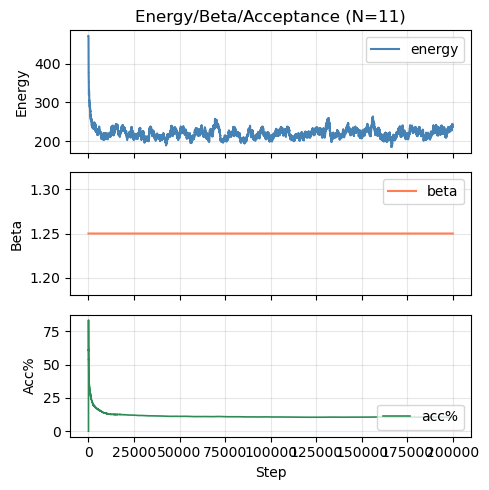

In [2]:
trace = run_mcmc(N=11, beta=1.25, max_steps=200000, verbose=True, schedule="fixed", seed=123)
plot_energy_curve(trace)

N=11, schedule=fixed:   0%|          | 0/3 [00:00<?, ?it/s]

N=11, num_zero_runs=0, final_energies=[243, 233, 219]


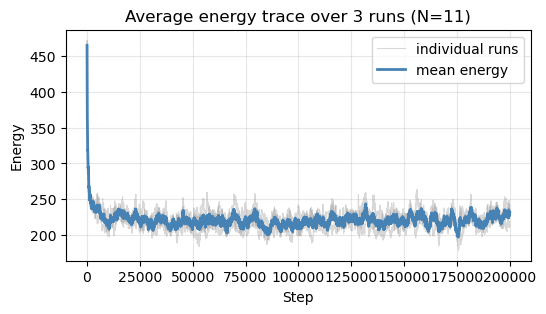

In [3]:
result = average_energy_over_runs(N=11, beta=1.25, max_steps=200000, runs=3, base_seed=123)
plot_energy_curve_average(*result)

## MCMC with annealing

step 5000: energy=256, beta=1.010, acceptance=21.4%
step 10000: energy=272, beta=1.020, acceptance=19.2%
step 15000: energy=242, beta=1.031, acceptance=18.5%
step 20000: energy=227, beta=1.041, acceptance=17.8%
step 25000: energy=241, beta=1.052, acceptance=17.1%
step 30000: energy=244, beta=1.063, acceptance=16.7%
step 35000: energy=257, beta=1.074, acceptance=16.6%
step 40000: energy=229, beta=1.084, acceptance=16.2%
step 45000: energy=232, beta=1.096, acceptance=16.0%
step 50000: energy=241, beta=1.107, acceptance=15.9%
step 55000: energy=245, beta=1.118, acceptance=15.8%
step 60000: energy=240, beta=1.129, acceptance=15.6%
step 65000: energy=240, beta=1.141, acceptance=15.4%
step 70000: energy=238, beta=1.152, acceptance=15.4%
step 75000: energy=215, beta=1.164, acceptance=15.2%
step 80000: energy=216, beta=1.176, acceptance=14.9%
step 85000: energy=234, beta=1.188, acceptance=14.7%
step 90000: energy=241, beta=1.200, acceptance=14.7%
step 95000: energy=240, beta=1.212, acceptance=

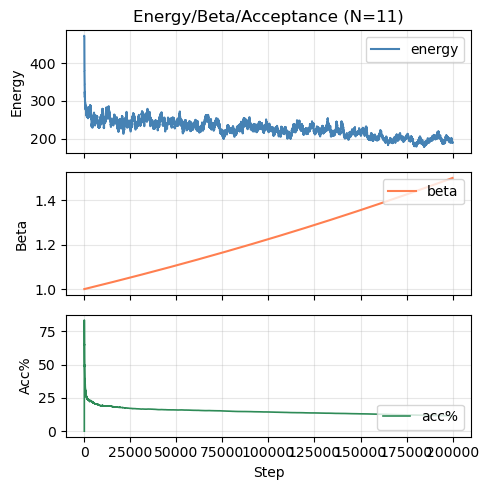

In [6]:
trace = run_mcmc(N=11, beta=1.0, beta_end=1.5, max_steps=200000, verbose=True, schedule="geometric", cooling_rate=1.001, seed=123)
plot_energy_curve(trace)

N=11, schedule=geometric:   0%|          | 0/3 [00:00<?, ?it/s]

N=11, num_zero_runs=0, final_energies=[190, 190, 187]


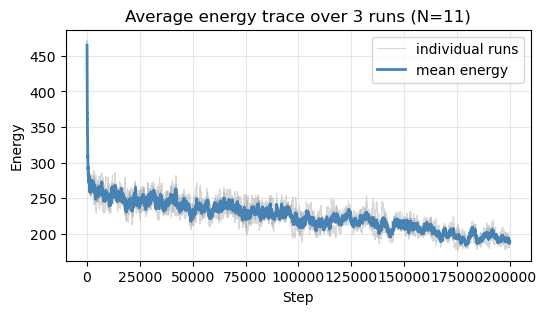

In [7]:
result = average_energy_over_runs(N=11, beta=1.0, beta_end=1.5, max_steps=200000, runs=3, base_seed=123, schedule="geometric", cooling_rate=1.001)
plot_energy_curve_average(*result)

## Comparing the effect of annealing

N=11, schedule=fixed:   0%|          | 0/5 [00:00<?, ?it/s]

N=11, num_zero_runs=0, final_energies=[243, 233, 219, 229, 196]


N=11, schedule=geometric:   0%|          | 0/5 [00:00<?, ?it/s]

N=11, num_zero_runs=0, final_energies=[190, 190, 187, 207, 204]


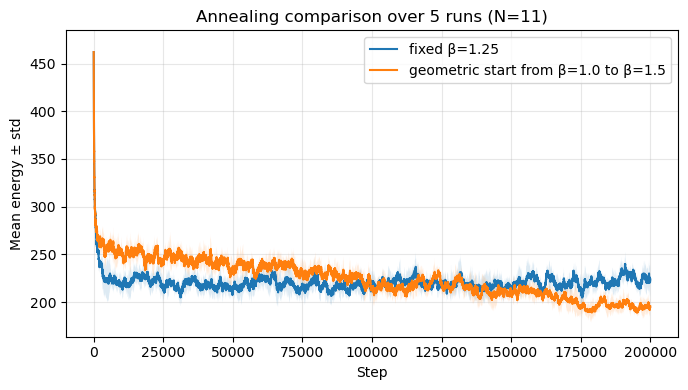

In [2]:
compare_annealing_effect(N=11, beta_fix=1.25, beta_annealing_start=1.0, beta_annealing_end=1.5, max_steps=200000, runs=5, base_seed=123, cooling_rate=1.001)

## Minimal energy vs. board size (annealing)

Use the simulated annealing routine for a sweep of N values and log the smallest energy observed. Larger N typically demand more annealing steps or repeated runs before the curve stabilizes.

Processing N values:   0%|          | 0/11 [00:00<?, ?it/s]

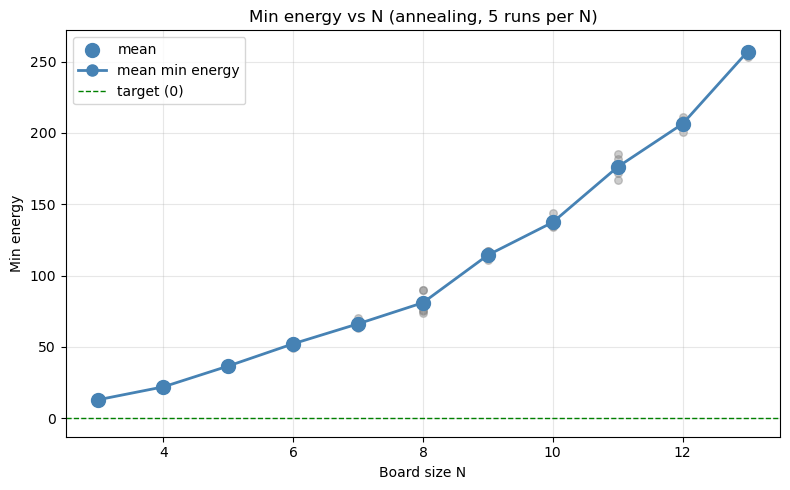

In [3]:
N_values = np.arange(3, 14)
result = min_energy_vs_N(N_values, beta=1.0, beta_end=1.5, max_steps=200000, runs=5, schedule="geometric", cooling_rate=1.001, target_energy=0, base_seed=123)
plot_min_energy_vs_N(result)

## Optimal Solution illustration

In [7]:
def latin_queen_construction(N):
    """
    Construct a Latin square-based initial state for totally_free representation.
    Returns an array of shape (N^2, 3) where each row is (i, j, k).
    """
    a, b = 3, 5
    # Create height matrix
    height_matrix = np.zeros((N, N), dtype=int)
    for i in range(N):
        for j in range(N):
            height_matrix[i, j] = (a * i + b * j) % N
    
    # Convert to totally_free format: array of shape (N^2, 3)
    state = np.empty((N * N, 3), dtype=int)
    idx = 0
    for i in range(N):
        for j in range(N):
            k = height_matrix[i, j]
            state[idx] = (i, j, k)
            idx += 1
    
    return state

In [8]:
N = 11
state = latin_queen_construction(N)
print(state)
print("energy of Latin-queen construction:", compute_energy(state))

[[ 0  0  0]
 [ 0  1  5]
 [ 0  2 10]
 [ 0  3  4]
 [ 0  4  9]
 [ 0  5  3]
 [ 0  6  8]
 [ 0  7  2]
 [ 0  8  7]
 [ 0  9  1]
 [ 0 10  6]
 [ 1  0  3]
 [ 1  1  8]
 [ 1  2  2]
 [ 1  3  7]
 [ 1  4  1]
 [ 1  5  6]
 [ 1  6  0]
 [ 1  7  5]
 [ 1  8 10]
 [ 1  9  4]
 [ 1 10  9]
 [ 2  0  6]
 [ 2  1  0]
 [ 2  2  5]
 [ 2  3 10]
 [ 2  4  4]
 [ 2  5  9]
 [ 2  6  3]
 [ 2  7  8]
 [ 2  8  2]
 [ 2  9  7]
 [ 2 10  1]
 [ 3  0  9]
 [ 3  1  3]
 [ 3  2  8]
 [ 3  3  2]
 [ 3  4  7]
 [ 3  5  1]
 [ 3  6  6]
 [ 3  7  0]
 [ 3  8  5]
 [ 3  9 10]
 [ 3 10  4]
 [ 4  0  1]
 [ 4  1  6]
 [ 4  2  0]
 [ 4  3  5]
 [ 4  4 10]
 [ 4  5  4]
 [ 4  6  9]
 [ 4  7  3]
 [ 4  8  8]
 [ 4  9  2]
 [ 4 10  7]
 [ 5  0  4]
 [ 5  1  9]
 [ 5  2  3]
 [ 5  3  8]
 [ 5  4  2]
 [ 5  5  7]
 [ 5  6  1]
 [ 5  7  6]
 [ 5  8  0]
 [ 5  9  5]
 [ 5 10 10]
 [ 6  0  7]
 [ 6  1  1]
 [ 6  2  6]
 [ 6  3  0]
 [ 6  4  5]
 [ 6  5 10]
 [ 6  6  4]
 [ 6  7  9]
 [ 6  8  3]
 [ 6  9  8]
 [ 6 10  2]
 [ 7  0 10]
 [ 7  1  4]
 [ 7  2  9]
 [ 7  3  3]
 [ 7  4  8]
 [ 7  5  2]
 [ 7